<a href="https://colab.research.google.com/github/Eshashr/My-Projects/blob/main/DataMiningTechniquesProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Two

This assignment uses a dataset created for it that we will explore with decision trees, random forest, k-means and association rules. The dataset has four numeric feature columns, A - D, and one binary class column, Z. 

Make a copy of this file and append your Hollins username to the end of the filename (in the upper left). When you are ready to submit share the file with the Google account I use for data science classes: hollinsdatascience@gmail.com.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
raw_df = pd.read_csv('/content/drive/My Drive/HDS/CMPS 335/Assignments/project_two_data.csv')
raw_df.head()

,A,B,C,D,Z
0,1.282312,2.051017,2.498082,0.397016,0
1,1.931789,1.692757,2.254481,1.997854,0
2,1.539587,3.192589,2.741863,2.328939,0
3,2.031125,1.659627,1.972386,1.949399,0
4,2.136543,3.802455,2.053983,1.923515,0


In [ ]:
# Create training and test sets using a fixed random state for reproducibility
training_set, test_set = train_test_split(raw_df, test_size=0.20, random_state=8)

# Use all of the features, excluding Outcome at the end
training_features = training_set.iloc[:,:-1]
# Targets are at the end
training_targets = training_set.iloc[:,-1]

# Pull out the same features and targets from test set
testing_features = test_set.iloc[:,:-1]
testing_targets = test_set.iloc[:,-1]

## Part One

1) Train a decision tree classifier, with ccp_apha=0.01 (for post-pruning), on the training data and evaluate it using the score method on the testing data. The score method gives us the accuracy quickly, a reminder of the code is below. Since we are not exploring different hyperparameters you do not need to use cross-validation.



```
dt_model.score(testing_features, testing_targets)
```



In [ ]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.01)
dt_model.fit(training_features, training_targets)
dt_model.score(testing_features, testing_targets) 

0.8958333333333334

2) Train a random forest classifier, with ccp_apha=0.01, on the on the training data and evaluate it using the score method on the testing data. Again, no need to use cross-validation here either.

How does the random forest model compare to the single decision tree?

In [ ]:
rf_model = RandomForestClassifier(ccp_alpha=0.01)
rf_model.fit(training_features, training_targets)
rf_model.score(testing_features, testing_targets)

0.9375

Random Forest seems to be more accurate.

## Part Two

In this part we are going to use k-means to cluster on some of the dimensions and reduce our total features from four to two.

1) Create a scatter plot of B vs A, meaning B on the y-axis and A on the x-axis, with the points colored by our class column, Z. If you are using Altair, use color='Z:N' to intepret the type of the Z column as nominal in order to get one color for each class.

Looking at the scatterplot what might be a good number of clusters?

In [ ]:
mycols = ['A','B','Z']
raw_df[mycols]

,A,B,Z
0,1.282312,2.051017,0
1,1.931789,1.692757,0
2,1.539587,3.192589,0
3,2.031125,1.659627,0
4,2.136543,3.802455,0
...,...,...,...
235,-1.104000,0.026262,1
236,-2.252266,-1.072542,1
237,-0.455877,-1.398331,1
238,-2.004211,-0.663514,1


In [ ]:
alt.Chart(raw_df[mycols]).mark_point().encode(
    alt.X('A'),
    alt.Y('B'),
    color = "Z:N")

alt.Chart(...)

2) Now we are going to create an elbow plot of the inertias across different values of k for clustering on the A and B columns. Calculate the inertia for values of k 1-7. Then create a line plot (ideally also with points) of the inertia vs k. See code below for running k-means with k set to one, I set the random state for purposes of reproducibility on the assignment.



```
km1 = KMeans(n_clusters=1, random_state=0).fit(raw_df.iloc[:,0:2])
```



In [ ]:
km1 = KMeans(n_clusters = 1, random_state = 0).fit(raw_df.iloc[:,0:2])
km2 = KMeans(n_clusters = 2, random_state = 0).fit(raw_df.iloc[:,0:2])
km3 = KMeans(n_clusters = 3, random_state = 0).fit(raw_df.iloc[:,0:2])
km4 = KMeans(n_clusters = 4, random_state = 0).fit(raw_df.iloc[:,0:2])
km5 = KMeans(n_clusters = 5, random_state = 0).fit(raw_df.iloc[:,0:2])
km6 = KMeans(n_clusters = 6, random_state = 0).fit(raw_df.iloc[:,0:2])
km7 = KMeans(n_clusters = 7, random_state = 0).fit(raw_df.iloc[:,0:2])

k_values = [1,2,3,4,5,6,7]
inertia = [km1.inertia_, km2.inertia_, km3.inertia_, km4.inertia_, km5.inertia_, km6.inertia_, km7.inertia_]
result_df = pd.DataFrame({'k':k_values, 'Inertia':inertia})
result_df

,k,Inertia
0,1,1679.424622
1,2,649.007298
2,3,304.629122
3,4,252.542262
4,5,208.360525
5,6,182.665804
6,7,155.799375


In [ ]:
line = alt.Chart(result_df).mark_line().encode(
    x = 'k',
    y = 'Inertia')

points = alt.Chart(result_df).mark_point().encode(
    x = 'k',
    y = 'Inertia')

line + points

alt.LayerChart(...)

3) I picked a value of 3 for my k when clustering on A and B. Why did I choose that value?

Because when there is low k, there is a low inertia. So when K = 3 the curve bends and that is exactly what we need here.

4) Now, create a scatter plot of D vs C with the points colored by our class column, Z.

Looking at the scatterplot what might be a good number of clusters?

In [ ]:
mycolumns = ['C','D','Z']
raw_df[mycolumns]

,C,D,Z
0,2.498082,0.397016,0
1,2.254481,1.997854,0
2,2.741863,2.328939,0
3,1.972386,1.949399,0
4,2.053983,1.923515,0
...,...,...,...
235,2.092193,-2.416801,1
236,2.120068,-2.643103,1
237,1.894980,-2.616800,1
238,3.134005,-2.355999,1


In [ ]:
alt.Chart(raw_df[mycolumns]).mark_point().encode(
    alt.X('C'),
    alt.Y('D'),
    color = "Z:N")

alt.Chart(...)

Looking at the scatterplot, 4 seems like a good cluster.

5) Again, create an elbow plot of the inertias across different values of k for clustering on the C and D columns. Calculate the inertia for values of k 1-7. Then create a line plot (ideally also with points) of the inertia vs k.

In [ ]:
km1 = KMeans(n_clusters = 1, random_state = 0).fit(raw_df.iloc[:,2:4])
km2 = KMeans(n_clusters = 2, random_state = 0).fit(raw_df.iloc[:,2:4])
km3 = KMeans(n_clusters = 3, random_state = 0).fit(raw_df.iloc[:,2:4])
km4 = KMeans(n_clusters = 4, random_state = 0).fit(raw_df.iloc[:,2:4])
km5 = KMeans(n_clusters = 5, random_state = 0).fit(raw_df.iloc[:,2:4])
km6 = KMeans(n_clusters = 6, random_state = 0).fit(raw_df.iloc[:,2:4])
km7 = KMeans(n_clusters = 7, random_state = 0).fit(raw_df.iloc[:,2:4])

k_values = [1,2,3,4,5,6,7]
inertia = [km1.inertia_, km2.inertia_, km3.inertia_, km4.inertia_, km5.inertia_, km6.inertia_, km7.inertia_]
result_df = pd.DataFrame({'k':k_values, 'Inertia':inertia})
result_df

,k,Inertia
0,1,2066.285570
1,2,1081.659836
2,3,583.181884
3,4,107.278205
4,5,94.494128
5,6,84.099338
6,7,75.277067


In [ ]:
line = alt.Chart(result_df).mark_line().encode(
    x = 'k',
    y = 'Inertia')

points = alt.Chart(result_df).mark_point().encode(
    x = 'k',
    y = 'Inertia')

line + points

alt.LayerChart(...)

6) I picked a value of 4 for my k when clustering on C and D. Why did I choose that value?

Value 4 is good because we still want a low k and as we can see from the graph, low k gives low intertia which can be obtained when k = 4

## Part Three

In this part we will re-train our decision tree and random forest models on the clustered data. We have to dummy-code the cluster labels because the label values are random, i.e. cluster zero is not less than cluster one, and if we leave them as is the models will assume the labels are numeric values.

In [ ]:
# This code creates the clustered dataset

# Note that we are clustering on the whole dataset, ideally
# you would cluster on just the training data and then apply
# those clusters to the testing data.
# What we are doing here is fine for the assignment,
# but not what you would want to do in a real world context.

# Cluster the data
km_ab = KMeans(n_clusters=3, random_state=0).fit(raw_df.iloc[:,0:2])
km_cd = KMeans(n_clusters=4, random_state=0).fit(raw_df.iloc[:,2:4])

# Pull out the labels and ensure they are of type category
# For get_dummies to work it needs categorical data
ab_labels = pd.Series(km_ab.labels_).astype('category')
cd_labels = pd.Series(km_cd.labels_).astype('category')
class_labels = raw_df['Z'].astype('category')

# Create the dataset with dummy-coded cluster columns and our
# class labels (which are not dummy-coded)
clustered_df = pd.DataFrame({"AB":ab_labels, "CD":cd_labels})
clustered_df = pd.get_dummies(clustered_df)
clustered_df['Z'] = class_labels
clustered_df.head()

,AB_0,AB_1,AB_2,CD_0,CD_1,CD_2,CD_3,Z
0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0


In [ ]:
# Create training and test sets
training_set, test_set = train_test_split(clustered_df, test_size=0.20, random_state=8)

# Use all of the features, excluding Outcome at the end
training_features = training_set.iloc[:,:-1]
# Targets are at the end
training_targets = training_set.iloc[:,-1]

# Pull out the same features and targets from test set
testing_features = test_set.iloc[:,:-1]
testing_targets = test_set.iloc[:,-1]

1) Train a decision tree classifier, with ccp_apha=0.01, on the on the new clustered training data and evaluate it using the score method on the new testing data. Again, no need to use cross-validation.

How does your decision tree's performance compare to the earlier decision tree that trained on the unclustered data?

In [ ]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.01)
dt_model.fit(training_features, training_targets)
dt_model.score(testing_features, testing_targets)

0.9583333333333334

2) Run the code below after training your decision tree to output the tree structure (change dt_model to whatever variable holds your tree). 

Find each of the paths through the tree. Remember that the arrow going left is the True path and the arrow going right is the False path. The decision tree boundaries are always <= boundaries, which for our dummy-coded data indicates absence. For example, AB_1 <= 0.5 is true for data that does not fall into cluster 1 of the AB clusters, essentially not AB_1. 

List the paths in logical notation with ~ indicating not, e.g. ~AB_1 & CD_3 & ~AB_2 -> Z_0 where Z_0 indicates class equals 0.

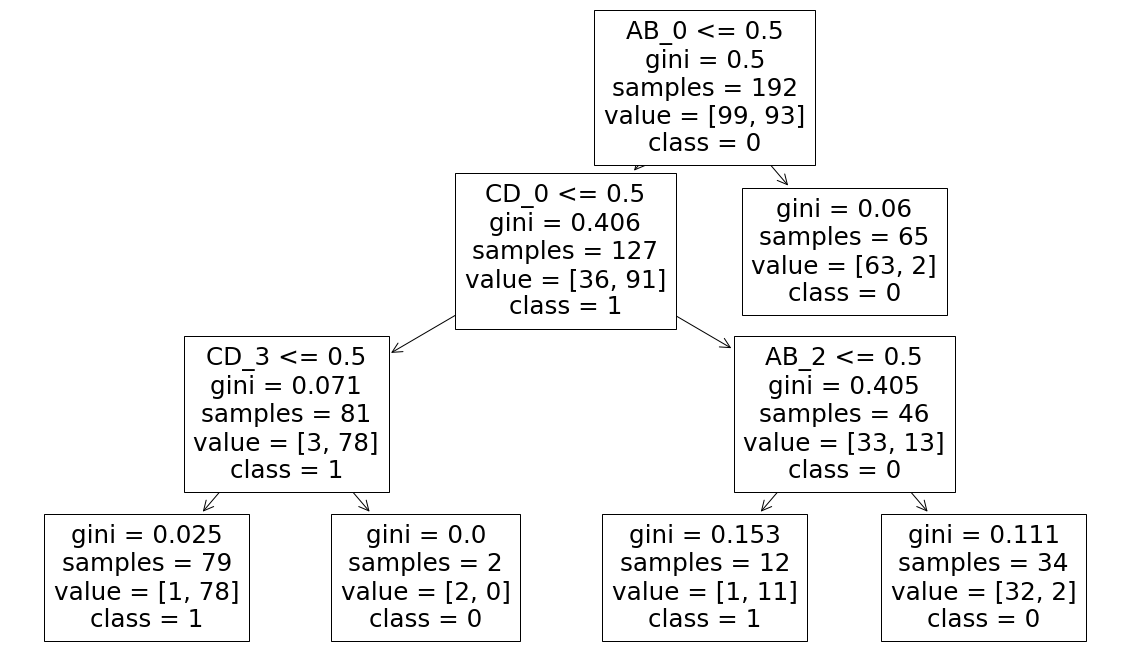

In [ ]:
# Run this code after training your decision tree to output it.
plt.figure(figsize=(20,12))
plot_tree(dt_model, feature_names=clustered_df.columns[:-1], class_names=['0','1'])
plt.show()

~AB_1 -> Z_0

AB_1 & ~CD_3 & AB_2 -> Z_0

AB_1 & CD_3 & ~CD_2 -> Z_0

AB_1 & ~CD_3 & ~AB_2 -> Z_1

AB_1 & CD_3 & CD_2 -> Z_1

3) Train a random forest classifier, with ccp_apha=0.01, on the on the new clustered training data and evaluate it using the score method on the new testing data. Again, no need to use cross-validation.

How does your random forest's performance compare to the earlier decision tree that trained on the unclustered data?

How does it compare to the decision tree trained on the clustered data?

In [ ]:
rf_model = RandomForestClassifier(ccp_alpha=0.01)
rf_model.fit(training_features, training_targets)
rf_model.score(testing_features, testing_targets)

0.9583333333333334

This score is higher than the one earlier on the unclustered data.
This score is the same as the decision ree trained on the clustered data.

## Part Four

This last part looks at the clustered data set using association rules mining. Since the clustering rendered our data categorical, it is now suitable for association rules.

In [ ]:
# Create fully dummy coded data for association rules.
# We have to also cluster the class labels here so that both
# class labels show up in our itemsets.

# This code uses the labels that we created earlier when clustering
dummies_df = pd.DataFrame({"AB":ab_labels, "CD":cd_labels, "Z":class_labels})
dummies_df = pd.get_dummies(clustered_df)
dummies_df.head()

,AB_0,AB_1,AB_2,CD_0,CD_1,CD_2,CD_3,Z_0,Z_1
0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,1,0


1) Find the rules that have a minimum support of 0.05 and a minimum confidence of 0.75.

In [ ]:
frequent_itemsets = apriori(dummies_df, min_support = 0.05, use_colnames = True)
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.75)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CD_3),(AB_0),0.250000,0.320833,0.237500,0.950000,2.961039,0.157292,13.583333
1,(AB_0),(Z_0),0.320833,0.495833,0.312500,0.974026,1.964422,0.153420,19.410417
2,(CD_1),(AB_1),0.250000,0.291667,0.216667,0.866667,2.971429,0.143750,5.312500
3,(AB_1),(Z_1),0.291667,0.504167,0.283333,0.971429,1.926800,0.136285,17.354167
4,(CD_1),(Z_1),0.250000,0.504167,0.250000,1.000000,1.983471,0.123958,inf
5,(CD_3),(Z_0),0.250000,0.495833,0.250000,1.000000,2.016807,0.126042,inf
6,"(AB_0, CD_2)",(Z_0),0.079167,0.495833,0.070833,0.894737,1.804511,0.031580,4.789583
7,"(CD_2, Z_0)",(AB_0),0.075000,0.320833,0.070833,0.944444,2.943723,0.046771,12.225000
8,"(AB_0, Z_0)",(CD_3),0.312500,0.250000,0.237500,0.760000,3.040000,0.159375,3.125000
9,"(AB_0, CD_3)",(Z_0),0.237500,0.495833,0.237500,1.000000,2.016807,0.119740,inf


2) Pull out the rules whose consequents are Z_1 or Z_0. You can do this in two calls if you like.

In [ ]:
rules[rules['consequents'] == {'Z_1'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(AB_1),(Z_1),0.291667,0.504167,0.283333,0.971429,1.926800,0.136285,17.354167
4,(CD_1),(Z_1),0.250000,0.504167,0.250000,1.000000,1.983471,0.123958,inf
13,"(AB_1, CD_0)",(Z_1),0.075000,0.504167,0.066667,0.888889,1.763085,0.028854,4.462500
16,"(AB_1, CD_1)",(Z_1),0.216667,0.504167,0.216667,1.000000,1.983471,0.107431,inf
23,"(CD_2, AB_2)",(Z_1),0.170833,0.504167,0.166667,0.975610,1.935094,0.080538,20.329167


In [ ]:
rules[rules['consequents'] == {'Z_0'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(AB_0),(Z_0),0.320833,0.495833,0.312500,0.974026,1.964422,0.153420,19.410417
5,(CD_3),(Z_0),0.250000,0.495833,0.250000,1.000000,2.016807,0.126042,inf
6,"(AB_0, CD_2)",(Z_0),0.079167,0.495833,0.070833,0.894737,1.804511,0.031580,4.789583
9,"(AB_0, CD_3)",(Z_0),0.237500,0.495833,0.237500,1.000000,2.016807,0.119740,inf
20,"(CD_0, AB_2)",(Z_0),0.170833,0.495833,0.158333,0.926829,1.869235,0.073628,6.890278


3) (Extra Credit) Find the paths from your decision tree in the rules that you outputted above. You will have to adjust the logic of your decision tree paths to fit the rules. The decision tree looked for the absence of categories and the rules look for the presence of categories.

For example, the path ~AB_1 & CD_3 & ~AB_2 -> Z_0 is the same as AB_0 & CD_3 -> Z_0 because if a data point isn't in AB_1 or AB_2 then it must be in AB_0. Similarly ~AB_1 & AB_0 -> Z_0 is the same as AB_0 -> Z_0 because if you are in AB_0 then we already know you can't be in the other AB clusters.

Conversions like this can help you adapt the paths to rules that don't have logical nots. It is possible that you can't convert a path to a rule, but you should be able to convert most of the them.

For each of your paths from your decision tree list the corresponding rule from you association rules mining. If you can't find a corresponding rule then list that.

Note that extra credit can't raise your grade above 100% for this assignment.

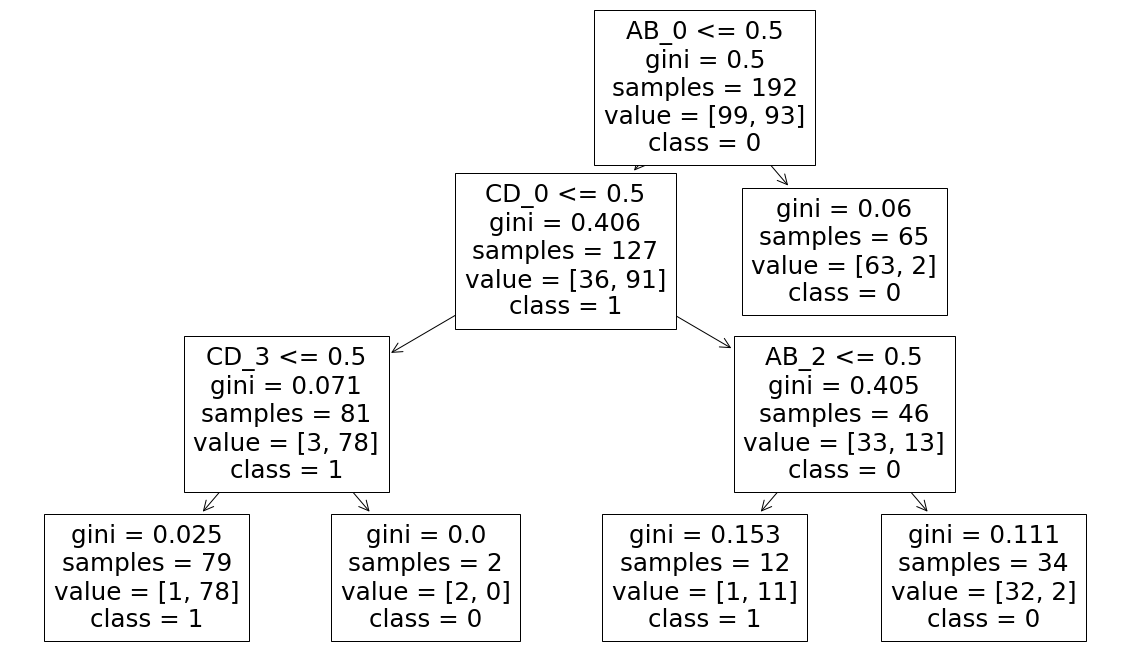

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(dt_model, feature_names=clustered_df.columns[:-1], class_names=['0','1'])
plt.show()

~AB_1 & CD_2 -> Z_0

AB_1 & ~CD_1 -> Z_0

AB_1 & CD_1 & AB_0 -> Z_1

AB_1 & CD_1 & ~AB_0 & ~CD_3 -> Z_0

AB_1 & CD_1 & ~AB_0 & CD_3 & AB_2 & CD_0 -> Z_1